<div class="alert alert-block alert-info"><b>Предисловие:</b> 
<p>Привет</p>
<p>т.к. в Я.Практикуме последнюю тему решили нориально не давать, я Х.З., что тут нужно делать и как правильно, будем разбираться вместе))</p>


# Прекод

# Сборный проект-4

Вам поручено разработать демонстрационную версию поиска изображений по запросу.

Для демонстрационной версии нужно обучить модель, которая получит векторное представление изображения, векторное представление текста, а на выходе выдаст число от 0 до 1 — покажет, насколько текст и картинка подходят друг другу.

### Описание данных

Данные лежат в папке `/datasets/image_search/`.

В файле `train_dataset.csv` находится информация, необходимая для обучения: имя файла изображения, идентификатор описания и текст описания. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат `<имя файла изображения>#<порядковый номер описания>`.

В папке `train_images` содержатся изображения для тренировки модели.

В файле `CrowdAnnotations.tsv` — данные по соответствию изображения и описания, полученные с помощью краудсорсинга. Номера колонок и соответствующий тип данных:

1. Имя файла изображения.
2. Идентификатор описания.
3. Доля людей, подтвердивших, что описание соответствует изображению.
4. Количество человек, подтвердивших, что описание соответствует изображению.
5. Количество человек, подтвердивших, что описание не соответствует изображению.

В файле `ExpertAnnotations.tsv` содержатся данные по соответствию изображения и описания, полученные в результате опроса экспертов. Номера колонок и соответствующий тип данных:

1. Имя файла изображения.
2. Идентификатор описания.

3, 4, 5 — оценки трёх экспертов.

Эксперты ставят оценки по шкале от 1 до 4, где 1 — изображение и запрос совершенно не соответствуют друг другу, 2 — запрос содержит элементы описания изображения, но в целом запрос тексту не соответствует, 3 — запрос и текст соответствуют с точностью до некоторых деталей, 4 — запрос и текст соответствуют полностью.

В файле `test_queries.csv` находится информация, необходимая для тестирования: идентификатор запроса, текст запроса и релевантное изображение. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат `<имя файла изображения>#<порядковый номер описания>`.

В папке `test_images` содержатся изображения для тестирования модели.

## 1. Исследовательский анализ данных

Наш датасет содержит экспертные и краудсорсинговые оценки соответствия текста и изображения.

В файле с экспертными мнениями для каждой пары изображение-текст имеются оценки от трёх специалистов. Для решения задачи вы должны эти оценки агрегировать — превратить в одну. Существует несколько способов агрегации оценок, самый простой — голосование большинства: за какую оценку проголосовала большая часть экспертов (в нашем случае 2 или 3), та оценка и ставится как итоговая. Поскольку число экспертов меньше числа классов, может случиться, что каждый эксперт поставит разные оценки, например: 1, 4, 2. В таком случае данную пару изображение-текст можно исключить из датасета.

Вы можете воспользоваться другим методом агрегации оценок или придумать свой.

В файле с краудсорсинговыми оценками информация расположена в таком порядке: 

1. Доля исполнителей, подтвердивших, что текст **соответствует** картинке. 
2. Количество исполнителей, подтвердивших, что текст **соответствует** картинке.
3. Количество исполнителей, подтвердивших, что текст **не соответствует** картинке.

После анализа экспертных и краудсорсинговых оценок выберите либо одну из них, либо объедините их в одну по какому-то критерию: например, оценка эксперта принимается с коэффициентом 0.6, а крауда — с коэффициентом 0.4.

Ваша модель должна возвращать на выходе вероятность соответствия изображения тексту, поэтому целевая переменная должна иметь значения от 0 до 1.


In [1]:
# То что читал попутно
# https://thinkingneuron.com/how-to-classify-text-using-word2vec/
# https://builtin.com/machine-learning/nlp-word2vec-python
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import re

import nltk

from nltk.corpus import stopwords as nltk_stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

english_stopwords = set(nltk_stopwords.words('english'))
null_stopwords = []
vect = CountVectorizer()
tf_vect = TfidfVectorizer()
#tf_vect_stop = TfidfVectorizer(stop_words=stopwords)

#m = Mystem()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dmitry/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/dmitry/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/dmitry/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /Users/dmitry/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
from gensim.models import Word2Vec
import numpy as np

In [3]:
# https://russianblogs.com/article/37751553118/
# https://medium.com/@nina95dan/simple-image-classification-with-resnet-50-334366e7311a
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path

In [4]:
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, Flatten, Dense, AveragePooling2D, MaxPooling2D, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

2022-09-12 00:03:00.200761: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
import sklearn.linear_model as lm
from sklearn.model_selection import GroupShuffleSplit

In [6]:
# Читаем данные именуем столбцы
df_t = pd.read_csv('source/train_dataset.csv')
df_c = pd.read_csv('source/CrowdAnnotations.tsv', sep='\t', names=['image', 'query_id', 'proc', 't', 'f'])
df_e = pd.read_csv('source/ExpertAnnotations.tsv', sep='\t', names=['image', 'query_id', 'e1', 'e2', 'e3'])

In [7]:
# Функция покажет количество уникальных оценок в датасете
def len_list_in_col(row:pd.Series)->int:
    result = len(set(row))
    return result
# Возьмём предложенный метод
df_e['el'] = df_e[['e1', 'e2', 'e3']].values.tolist()
df_e['el'] = df_e['el'].apply(len_list_in_col)
df_e = df_e[df_e['el']!=3].copy()
df_e['em'] = df_e[['e1', 'e2', 'e3']].mode(axis=1)[0]
# Ну всё оценки экспертов лежат в столбце em
df_e

,image,query_id,e1,e2,e3,el,em
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1,1,1,1,1
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1,1,2,2,1
2,1056338697_4f7d7ce270.jpg,3181701312_70a379ab6e.jpg#2,1,1,2,2,1
3,1056338697_4f7d7ce270.jpg,3207358897_bfa61fa3c6.jpg#2,1,2,2,2,2
4,1056338697_4f7d7ce270.jpg,3286822339_5535af6b93.jpg#2,1,1,2,2,1
...,...,...,...,...,...,...,...
5817,997722733_0cb5439472.jpg,2981702521_2459f2c1c4.jpg#2,1,1,1,1,1
5818,997722733_0cb5439472.jpg,2985679744_75a7102aab.jpg#2,1,1,1,1,1
5819,997722733_0cb5439472.jpg,3150742439_b8a352e1e0.jpg#2,1,1,2,2,1
5820,997722733_0cb5439472.jpg,3375070563_3c290a7991.jpg#2,1,1,1,1,1


In [8]:
# т.к. думать лень рашим в лоб, преобразуем оценки людей в эквивалент экспертных
converter_crowd_to_expert = {
    '[3, 0]':4,
    '[2, 1]':3,
    '[1, 2]':2,
    '[0, 3]':1
}

def crowd_to_exp(row:pd.Series, conv)->int:
    result = conv.get(str(row), None)
    return result
df_c['em'] = df_c[['t', 'f']].values.tolist()
df_c['em'] = df_c['em'].apply(crowd_to_exp,  **{'conv':converter_crowd_to_expert})

In [9]:
# Объеденим оценки экспертов и еще какието в один столбец
df_m = pd.merge(df_e, df_c, how='inner', on=['image','query_id'])
df_m['em_a'] = df_m['em_x'] * .6 + df_m['em_y'] * .4

In [10]:
# Преобразую всё что могу к значениям 0, 1
df_m['scaler_em_a'] = minmax_scale(df_m['em_a'], feature_range=(0, 1))
df_m['scaler_em_x'] = minmax_scale(df_m['em_x'], feature_range=(0, 1))
df_m['scaler_em_y'] = minmax_scale(df_m['em_y'], feature_range=(0, 1))

In [11]:
df_m

,image,query_id,e1,e2,e3,el,em_x,proc,t,f,em_y,em_a,scaler_em_a,scaler_em_x,scaler_em_y
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,1,1,1,1,1,0.000000,0,3,1.0,1.0,0.000000,0.000000,0.000000
1,1056338697_4f7d7ce270.jpg,2718495608_d8533e3ac5.jpg#2,1,1,2,2,1,0.000000,0,3,1.0,1.0,0.000000,0.000000,0.000000
2,1056338697_4f7d7ce270.jpg,434792818_56375e203f.jpg#2,1,1,2,2,1,0.000000,0,3,1.0,1.0,0.000000,0.000000,0.000000
3,1084040636_97d9633581.jpg,256085101_2c2617c5d0.jpg#2,2,3,3,2,3,0.333333,1,2,2.0,2.6,0.533333,0.666667,0.333333
4,1084040636_97d9633581.jpg,3396157719_6807d52a81.jpg#2,1,2,2,2,2,0.000000,0,3,1.0,1.6,0.200000,0.333333,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253,979383193_0a542a059d.jpg,3244747165_17028936e0.jpg#2,2,2,2,1,2,0.000000,0,3,1.0,1.6,0.200000,0.333333,0.000000
2254,979383193_0a542a059d.jpg,3482062809_3b694322c4.jpg#2,1,2,2,2,2,0.000000,0,3,1.0,1.6,0.200000,0.333333,0.000000
2255,997722733_0cb5439472.jpg,2985679744_75a7102aab.jpg#2,1,1,1,1,1,0.000000,0,3,1.0,1.0,0.000000,0.000000,0.000000
2256,997722733_0cb5439472.jpg,3150742439_b8a352e1e0.jpg#2,1,1,2,2,1,0.000000,0,3,1.0,1.0,0.000000,0.000000,0.000000


## 2. Проверка данных

В некоторых странах, где работает ваша компания, действуют ограничения по обработке изображений: поисковым сервисам и сервисам, предоставляющим возможность поиска, запрещено без разрешения родителей или законных представителей предоставлять любую информацию, в том числе, но не исключительно тексты, изображения, видео и аудио, содержащие описание, изображение или запись голоса детей. Ребёнком считается любой человек, не достигший 16 лет.

В вашем сервисе строго следуют законам стран, в которых работают. Поэтому при попытке посмотреть изображения, запрещённые законодательством, вместо картинок показывается дисклеймер:

> This image is unavailable in your country in compliance with local laws
> 

Однако у вас в PoC нет возможности воспользоваться данным функционалом. Поэтому все изображения, которые нарушают данный закон, нужно удалить из обучающей выборки.

In [12]:
# Мои стоп слова
my_stop = ['boy', 'child', 'girl']
# Лемматизация с моими стоп словами нужна для маркировки стоп лов знаком 16+
def get_lemm_word(sentence:str, stop_words:list, stop_words_my:list)->str:
    lemm_word_list = []
    sentence = re.sub(r'[^\w\s]', '', sentence).lower()
    word_list = nltk.word_tokenize(sentence)
    for word in word_list:
        lemm_word = lemmatizer.lemmatize(word)
        lemm_word_list.append(lemm_word)
    lemm_word_list = set(lemm_word_list) - set(stop_words)
    result = ' '.join(list(lemm_word_list))
    for word in stop_words_my:
        if word in result:
            result = '16+'
            break
    return result

# Основной лемматизатор
def lemmer(sentence:str, stop_words:list)->str:
    lemm_word_list = []
    word_list = nltk.word_tokenize(sentence)
    for word in word_list:
        lemm_word = lemmatizer.lemmatize(word.lower())
        in_stop_words=False
        for m in stop_words:
            if m == lemm_word:
                in_stop_words = True
                break
        if in_stop_words == False:
            lemm_word_list.append(lemm_word)
    result = ' '.join(list(lemm_word_list))
    return result

In [13]:
df_t['lemm'] = df_t['query_text'].apply(get_lemm_word, **{'stop_words':english_stopwords,
                                                         'stop_words_my':my_stop})

df_t['query_clean'] = df_t['query_text'].str.replace(r'[^\w\s]', '').str.lower()

df_t['query_clean_lemm'] = df_t['query_clean'].apply(lemmer, **{'stop_words':english_stopwords})

/var/folders/5m/zj2yj9bd5m55jbrzd0_nfd6m0000gn/T/ipykernel_7052/1613038779.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_t['query_clean'] = df_t['query_text'].str.replace(r'[^\w\s]', '').str.lower()


In [14]:
df_t

,image,query_id,query_text,lemm,query_clean,query_clean_lemm
0,1056338697_4f7d7ce270.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,16+,a young child is wearing blue goggles and sitt...,young child wearing blue goggles sitting float...
1,1262583859_653f1469a9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,16+,a young child is wearing blue goggles and sitt...,young child wearing blue goggles sitting float...
2,2447284966_d6bbdb4b6e.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,16+,a young child is wearing blue goggles and sitt...,young child wearing blue goggles sitting float...
3,2549968784_39bfbe44f9.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,16+,a young child is wearing blue goggles and sitt...,young child wearing blue goggles sitting float...
4,2621415349_ef1a7e73be.jpg,2549968784_39bfbe44f9.jpg#2,A young child is wearing blue goggles and sitt...,16+,a young child is wearing blue goggles and sitt...,young child wearing blue goggles sitting float...
...,...,...,...,...,...,...
5817,757046028_ff5999f91b.jpg,2061144717_5b3a1864f0.jpg#2,A man in an ampitheater talking to a boy .,16+,a man in an ampitheater talking to a boy,man ampitheater talking boy
5818,799486353_f665d7b0f0.jpg,2196107384_361d73a170.jpg#2,a old man walks down the uncrowded road .,man road uncrowded walk old,a old man walks down the uncrowded road,old man walk uncrowded road
5819,909808296_23c427022d.jpg,2112921744_92bf706805.jpg#2,A dog stands on the side of a grassy cliff .,side grassy dog cliff stand,a dog stands on the side of a grassy cliff,dog stand side grassy cliff
5820,929679367_ff8c7df2ee.jpg,3651971126_309e6a5e22.jpg#2,A blurry photo of two dogs .,photo two dog blurry,a blurry photo of two dogs,blurry photo two dog


## 3. Векторизация изображений

Перейдём к векторизации изображений.

Самый примитивный способ — прочесть изображение и превратить полученную матрицу в вектор. Такой способ нам не подходит: длина векторов может быть сильно разной, так как размеры изображений разные. Поэтому стоит обратиться к свёрточным сетям: они позволяют "выделить" главные компоненты изображений. Как это сделать? Нужно выбрать какую-либо архитектуру, например ResNet-18, посмотреть на слои и исключить полносвязные слои, которые отвечают за конечное предсказание. При этом можно загрузить модель данной архитектуры, предварительно натренированную на датасете ImageNet.

In [15]:
# https://russianblogs.com/article/37751553118/
paths = Path('source/train_images').rglob('*.jpg')
paths_img_for_test = Path('source/test_images').rglob('*.jpg')
# Получим в список пути картинок
jpg_paths = list(map(str, paths))
jpg_paths_img_for_test = list(map(str, paths_img_for_test))

In [16]:
# Получаем картинки в вектор
def img_to_vec_2(img_path:str, w, h):
    im_name = img_path.split('/')[-1]
    wh = width_img
    ht = height_img
    m = np.array(Image.open(path).convert('RGB').resize((wh,ht)))
    return im_name, m.reshape(1,wh,ht,3)

# Первая версия не используется
def img_to_vec(img_path:str, w, h):
    #preprocess_input(im_arr_L).shape
    im_name = path.split('/')[-1]
    wh = w
    ht = h
    im1 = np.array(Image.open(path).convert('L').resize((wh,ht))).reshape(1,wh,ht)
    im_stack = np.vstack((im1,im1))
    sample_counts, channels, width, height = im_stack.shape[0], 1, im_stack.shape[1], im_stack.shape[2]

    im_out = im_stack.reshape(sample_counts,  # Количество образцов
                              height,  # Количество строк в выборке
                              width,  # Количество столбцов в выборке
                              channels,  # Количество каналов
                             )
    r_vec = im_out/255
    return im_name, r_vec

# Та функция которая по идее получает вектора изображений но по какойто причине они почти все одинаковые
vector_len_for_img_and_text = 400
def create_model(input_shape):
    optimizer = Adam(learning_rate=0.1)
    backbone = ResNet50(input_shape=input_shape, weights='imagenet', include_top=False)
    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(vector_len_for_img_and_text, activation='relu'))
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])
    return model

In [17]:
width_img = height_img = 224
img_vec = dict()
model = create_model((width_img, height_img, 3))
for path in jpg_paths:
    n, v = img_to_vec_2(path, width_img, height_img)
    r50_v = model(v)
    img_vec[n] = r50_v.numpy()[0]
print('Part test')
img_vec_2 = dict()
for path in jpg_paths_img_for_test:
    n, v = img_to_vec_2(path, width_img, height_img)
    r50_v = model(v)
    img_vec_2[n] = r50_v.numpy()[0]

2022-09-12 00:03:09.555314: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Part test


## 4. Векторизация текстов

Следующий этап — векторизация текстов. Вы можете поэкспериментировать с несколькими способами векторизации текстов:

- tf-idf
- word2vec
- \*трансформеры (например Bert)

\* — если вы изучали трансформеры в спринте Машинное обучение для текстов.


In [18]:
df_clean = df_t[df_t['lemm']!='16+'][['image', 'query_id', 'query_clean_lemm']].copy()
features_train_tfidf = tf_vect.fit_transform(df_clean['query_clean_lemm'])

In [19]:
word2vec = Word2Vec(df_clean['query_clean_lemm'].str.split(' '), min_count=1, vector_size=vector_len_for_img_and_text)
def row_to_vec(words):
    result = word2vec.wv[words.split(' ')].mean(axis=0)
    return result
features_train_word2vec = df_clean['query_clean_lemm'].apply(row_to_vec)
#vectorizer = CountVectorizer()

#vec_query_clean_lemm = vectorizer.fit_transform(df_t[df_t['lemm']!='16+']['query_clean_lemm'].values)

#data  = pd.DataFrame(vec_query_clean_lemm.toarray(), columns=vectorizer.get_feature_names_out())
#data['lemm'] = df_t[df_t['lemm']!='16+']['query_clean_lemm']
#data[['image', 'query_id']] = df_t[df_t['lemm']!='16+'][['image', 'query_id']]
#data

## 5. Объединение векторов

Подготовьте данные для обучения: объедините векторы изображений и векторы текстов с целевой переменной.

In [20]:
df_clean['vec_img'] = df_clean['image'].map(img_vec)
df_clean['word2vec'] = features_train_word2vec
df_clean.reset_index(inplace=True, drop=True)
df_clean['tf_idf'] = pd.Series(features_train_tfidf.toarray().tolist())

In [21]:
# Ну будем думать, что угадал, но задача странная на объеденение векторов или я что-то не так понял
df_union = pd.merge(df_m[['image', 'query_id', 'scaler_em_a']], 
                    df_clean[['image', 'query_id', 'vec_img', 'word2vec', 'tf_idf']], 
                    how='inner', on=['image','query_id'])

In [22]:
df = df_union[['query_id', 'scaler_em_a', 'vec_img', 'word2vec', 'tf_idf']].copy()

## 6. Обучение модели предсказания соответствия

Для обучения разделите датасет на тренировочную и тестовую выборки. Простое случайное разбиение не подходит: нужно исключить попадание изображения и в обучающую, и в тестовую выборки.
Для того чтобы учесть изображения при разбиении, можно воспользоваться классом [GroupShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GroupShuffleSplit.html) из библиотеки sklearn.model_selection.

Код ниже разбивает датасет на тренировочную и тестовую выборки в пропорции 7:3 так, что строки с одинаковым значением 'group_column' будут содержаться либо в тестовом, либо в тренировочном датасете.

```
from sklearn.model_selection import GroupShuffleSplit
gss = GroupShuffleSplit(n_splits=1, train_size=.7, random_state=42)
train_indices, test_indices = next(gss.split(X=df.drop(columns=['target']), y=df['target'], groups=df['group_column']))
train_df, test_df = df.loc[train_indices], df.loc[test_indices]

```

Какую модель использовать — выберите самостоятельно. Также вам предстоит выбрать метрику качества либо реализовать свою.

In [23]:
gss = GroupShuffleSplit(n_splits=1, train_size=.7, random_state=42)
train_indices, test_indices = next(gss.split(X=df.drop(columns=['scaler_em_a']), y=df['scaler_em_a'], groups=df['query_id']))
train_df, test_df = df.loc[train_indices], df.loc[test_indices]

#min_vector_len_for_resize = min(train_df['vec_img'][0].shape[0], train_df['word2vec'][0].shape[0])
y_train = np.array(train_df['vec_img'].to_list())
x_train = np.array(train_df['word2vec'].to_list())

y_test = np.array(test_df['vec_img'].to_list())
x_test = np.array(test_df['word2vec'].to_list())

In [24]:
 def create_model_for_predict_vector_2(input_len, output_len):
    m=Sequential()
    m.add(Dense(units=output_len,input_dim=input_len))
    m.add(Dense(units=output_len))
    m.compile(optimizer='adam',loss='huber_loss')
    return m

def create_model_for_predict_vector_3(input_len, output_len):
    m=Sequential()
    m.add(Dense(units=1000,input_dim=input_len))
    m.add(Dense(700, activation='relu'))
    m.add(Dropout(.5))
    m.add(Dense(600, activation='relu'))
    m.add(Dense(output_len, activation='relu'))
    m.compile(optimizer='adam',loss='huber_loss')
    return m
def create_model_for_predict_vector_4(input_len, output_len):
    m=Sequential()
    m.add(Dense(units=1000,input_dim=input_len))
    m.add(Dense(700, activation='relu'))
    m.add(Dense(600, activation='relu'))
    m.add(Dropout(.5))
    m.add(Dense(500, activation='relu'))
    m.add(Dense(output_len, activation='relu'))
    m.compile(optimizer='adam',loss='huber_loss')
    return m
x_len = x_train[0].shape[0]
y_len = y_train[0].shape[0]
model2 = create_model_for_predict_vector_2(x_len, y_len)
model3 = create_model_for_predict_vector_3(x_len, y_len)
model4 = create_model_for_predict_vector_4(x_len, y_len)

In [25]:
model2.fit(x_train, y_train, validation_data=(x_test,y_test), batch_size=5, epochs=200)
model3.fit(x_train, y_train, validation_data=(x_test,y_test), batch_size=100, epochs=200)
model4.fit(x_train, y_train, validation_data=(x_test,y_test), batch_size=100, epochs=200)

Epoch 1/200
250/250 [==============================] - 1s 2ms/step - loss: 0.1881 - val_loss: 0.1836
Epoch 2/200
250/250 [==============================] - 1s 2ms/step - loss: 0.1814 - val_loss: 0.1823
Epoch 3/200
250/250 [==============================] - 1s 2ms/step - loss: 0.1799 - val_loss: 0.1812
Epoch 4/200
250/250 [==============================] - 1s 2ms/step - loss: 0.1790 - val_loss: 0.1796
Epoch 5/200
250/250 [==============================] - 1s 2ms/step - loss: 0.1782 - val_loss: 0.1784
Epoch 6/200
250/250 [==============================] - 1s 2ms/step - loss: 0.1770 - val_loss: 0.1772
Epoch 7/200
250/250 [==============================] - 1s 2ms/step - loss: 0.1765 - val_loss: 0.1767
Epoch 8/200
250/250 [==============================] - 1s 2ms/step - loss: 0.1761 - val_loss: 0.1761
Epoch 9/200
250/250 [==============================] - 1s 2ms/step - loss: 0.1749 - val_loss: 0.1749
Epoch 10/200
250/250 [==============================] - 1s 2ms/step - loss: 0.1747 - val_lo

250/250 [==============================] - 1s 2ms/step - loss: 0.1691 - val_loss: 0.1730
Epoch 82/200
250/250 [==============================] - 1s 2ms/step - loss: 0.1685 - val_loss: 0.1734
Epoch 83/200
250/250 [==============================] - 1s 2ms/step - loss: 0.1690 - val_loss: 0.1698
Epoch 84/200
250/250 [==============================] - 1s 2ms/step - loss: 0.1685 - val_loss: 0.1723
Epoch 85/200
250/250 [==============================] - 1s 2ms/step - loss: 0.1684 - val_loss: 0.1726
Epoch 86/200
250/250 [==============================] - 1s 2ms/step - loss: 0.1685 - val_loss: 0.1702
Epoch 87/200
250/250 [==============================] - 1s 2ms/step - loss: 0.1684 - val_loss: 0.1705
Epoch 88/200
250/250 [==============================] - 1s 2ms/step - loss: 0.1684 - val_loss: 0.1709
Epoch 89/200
250/250 [==============================] - 1s 2ms/step - loss: 0.1682 - val_loss: 0.1722
Epoch 90/200
250/250 [==============================] - 1s 2ms/step - loss: 0.1687 - val_loss: 

Epoch 161/200
250/250 [==============================] - 1s 3ms/step - loss: 0.1666 - val_loss: 0.1695
Epoch 162/200
250/250 [==============================] - 1s 3ms/step - loss: 0.1664 - val_loss: 0.1703
Epoch 163/200
250/250 [==============================] - 1s 3ms/step - loss: 0.1663 - val_loss: 0.1683
Epoch 164/200
250/250 [==============================] - 1s 3ms/step - loss: 0.1661 - val_loss: 0.1688
Epoch 165/200
250/250 [==============================] - 1s 2ms/step - loss: 0.1665 - val_loss: 0.1700
Epoch 166/200
250/250 [==============================] - 1s 3ms/step - loss: 0.1666 - val_loss: 0.1684
Epoch 167/200
250/250 [==============================] - 1s 3ms/step - loss: 0.1666 - val_loss: 0.1703
Epoch 168/200
250/250 [==============================] - 1s 3ms/step - loss: 0.1665 - val_loss: 0.1713
Epoch 169/200
250/250 [==============================] - 1s 2ms/step - loss: 0.1664 - val_loss: 0.1686
Epoch 170/200
250/250 [==============================] - 1s 2ms/step - lo

13/13 [==============================] - 0s 17ms/step - loss: 0.1766 - val_loss: 0.1778
Epoch 42/200
13/13 [==============================] - 0s 15ms/step - loss: 0.1751 - val_loss: 0.1757
Epoch 43/200
13/13 [==============================] - 0s 15ms/step - loss: 0.1754 - val_loss: 0.1762
Epoch 44/200
13/13 [==============================] - 0s 17ms/step - loss: 0.1756 - val_loss: 0.1754
Epoch 45/200
13/13 [==============================] - 0s 16ms/step - loss: 0.1759 - val_loss: 0.1789
Epoch 46/200
13/13 [==============================] - 0s 16ms/step - loss: 0.1755 - val_loss: 0.1767
Epoch 47/200
13/13 [==============================] - 0s 17ms/step - loss: 0.1758 - val_loss: 0.1768
Epoch 48/200
13/13 [==============================] - 0s 17ms/step - loss: 0.1750 - val_loss: 0.1765
Epoch 49/200
13/13 [==============================] - 0s 18ms/step - loss: 0.1743 - val_loss: 0.1748
Epoch 50/200
13/13 [==============================] - 0s 18ms/step - loss: 0.1744 - val_loss: 0.1754
Epo

13/13 [==============================] - 0s 17ms/step - loss: 0.1703 - val_loss: 0.1721
Epoch 123/200
13/13 [==============================] - 0s 17ms/step - loss: 0.1711 - val_loss: 0.1747
Epoch 124/200
13/13 [==============================] - 0s 17ms/step - loss: 0.1702 - val_loss: 0.1738
Epoch 125/200
13/13 [==============================] - 0s 17ms/step - loss: 0.1713 - val_loss: 0.1741
Epoch 126/200
13/13 [==============================] - 0s 16ms/step - loss: 0.1700 - val_loss: 0.1724
Epoch 127/200
13/13 [==============================] - 0s 17ms/step - loss: 0.1709 - val_loss: 0.1733
Epoch 128/200
13/13 [==============================] - 0s 17ms/step - loss: 0.1699 - val_loss: 0.1721
Epoch 129/200
13/13 [==============================] - 0s 17ms/step - loss: 0.1698 - val_loss: 0.1733
Epoch 130/200
13/13 [==============================] - 0s 18ms/step - loss: 0.1699 - val_loss: 0.1754
Epoch 131/200
13/13 [==============================] - 0s 16ms/step - loss: 0.1703 - val_loss: 0

13/13 [==============================] - 0s 15ms/step - loss: 0.1979 - val_loss: 0.1916
Epoch 3/200
13/13 [==============================] - 0s 17ms/step - loss: 0.1918 - val_loss: 0.1896
Epoch 4/200
13/13 [==============================] - 0s 17ms/step - loss: 0.1892 - val_loss: 0.1940
Epoch 5/200
13/13 [==============================] - 0s 20ms/step - loss: 0.1893 - val_loss: 0.1870
Epoch 6/200
13/13 [==============================] - 0s 19ms/step - loss: 0.1872 - val_loss: 0.1875
Epoch 7/200
13/13 [==============================] - 0s 18ms/step - loss: 0.1864 - val_loss: 0.1865
Epoch 8/200
13/13 [==============================] - 0s 19ms/step - loss: 0.1856 - val_loss: 0.1865
Epoch 9/200
13/13 [==============================] - 0s 18ms/step - loss: 0.1854 - val_loss: 0.1869
Epoch 10/200
13/13 [==============================] - 0s 17ms/step - loss: 0.1857 - val_loss: 0.1865
Epoch 11/200
13/13 [==============================] - 0s 17ms/step - loss: 0.1853 - val_loss: 0.1861
Epoch 12/2

13/13 [==============================] - 0s 16ms/step - loss: 0.1767 - val_loss: 0.1780
Epoch 84/200
13/13 [==============================] - 0s 17ms/step - loss: 0.1773 - val_loss: 0.1785
Epoch 85/200
13/13 [==============================] - 0s 17ms/step - loss: 0.1766 - val_loss: 0.1794
Epoch 86/200
13/13 [==============================] - 0s 18ms/step - loss: 0.1773 - val_loss: 0.1815
Epoch 87/200
13/13 [==============================] - 0s 15ms/step - loss: 0.1778 - val_loss: 0.1792
Epoch 88/200
13/13 [==============================] - 0s 16ms/step - loss: 0.1778 - val_loss: 0.1784
Epoch 89/200
13/13 [==============================] - 0s 18ms/step - loss: 0.1781 - val_loss: 0.1797
Epoch 90/200
13/13 [==============================] - 0s 17ms/step - loss: 0.1775 - val_loss: 0.1785
Epoch 91/200
13/13 [==============================] - 0s 17ms/step - loss: 0.1768 - val_loss: 0.1804
Epoch 92/200
13/13 [==============================] - 0s 16ms/step - loss: 0.1772 - val_loss: 0.1781
Epo

13/13 [==============================] - 0s 18ms/step - loss: 0.1733 - val_loss: 0.1758
Epoch 164/200
13/13 [==============================] - 0s 20ms/step - loss: 0.1740 - val_loss: 0.1760
Epoch 165/200
13/13 [==============================] - 0s 19ms/step - loss: 0.1737 - val_loss: 0.1763
Epoch 166/200
13/13 [==============================] - 0s 18ms/step - loss: 0.1730 - val_loss: 0.1758
Epoch 167/200
13/13 [==============================] - 0s 19ms/step - loss: 0.1730 - val_loss: 0.1761
Epoch 168/200
13/13 [==============================] - 0s 17ms/step - loss: 0.1730 - val_loss: 0.1760
Epoch 169/200
13/13 [==============================] - 0s 18ms/step - loss: 0.1730 - val_loss: 0.1755
Epoch 170/200
13/13 [==============================] - 0s 19ms/step - loss: 0.1732 - val_loss: 0.1759
Epoch 171/200
13/13 [==============================] - 0s 20ms/step - loss: 0.1733 - val_loss: 0.1768
Epoch 172/200
13/13 [==============================] - 0s 18ms/step - loss: 0.1730 - val_loss: 0

## 7. Тестирование модели

Настало время протестировать модель. Для этого получите эмбеддинги для всех тестовых изображений из папки `test_images`, выберите случайные 10 запросов из файла `test_queries.csv` и для каждого запроса выведите наиболее релевантное изображение. Сравните визуально качество поиска.

In [26]:
# Если в словаре нет слова то меняем его на нулевой вектор)
def row_to_vec_2(words):
    result = np.array([np.ones(vector_len_for_img_and_text)])
    for word in words.split(' '):
        if word in word2vec.wv:
            result = np.append(result, [word2vec.wv.get_vector(word)], axis = 0)
        else:
            result = np.append(result,[np.zeros(vector_len_for_img_and_text)], axis = 0)
    result = result[1:].mean(axis=0)
    return result

In [27]:
df_tt = pd.read_csv('source/test_queries.csv', sep='|')
df_tt.drop('Unnamed: 0', axis=1, inplace=True)

df_tt['lemm'] = df_tt['query_text'].apply(get_lemm_word, **{'stop_words':english_stopwords,
                                                         'stop_words_my':my_stop})

df_tt['query_clean'] = df_tt['query_text'].str.replace(r'[^\w\s]', '').str.lower()

df_tt['query_clean_lemm'] = df_tt['query_clean'].apply(lemmer, **{'stop_words':english_stopwords})
df_tt['query_clean_lemm'] = df_tt['query_clean'].apply(lemmer, **{'stop_words':english_stopwords})
features_train_word2vec = df_tt['query_clean_lemm'].apply(row_to_vec_2)
df_tt['word2vec'] = features_train_word2vec

df_tt = df_tt[df_tt['lemm']!='16+'].copy()

/var/folders/5m/zj2yj9bd5m55jbrzd0_nfd6m0000gn/T/ipykernel_7052/2601542513.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df_tt['query_clean'] = df_tt['query_text'].str.replace(r'[^\w\s]', '').str.lower()


In [28]:
df_tt['vec_img'] = df_tt['image'].map(img_vec_2)

In [37]:
list_for_test = list(df_tt.sample(10).index)
id_str_for_test = list_for_test[0]
#str_query_for_test = np.array([df_tt['word2vec'][id_str_for_test]])
#predict_img = model3.predict(str_query_for_test)

In [38]:
def get_distance_L2_vec(row, pred_img):
    result = np.linalg.norm(row - pred_img, ord=2)
    return result

def get_distance_mean_vec_img(row, pred_img):
    result = abs(row.sum() - pred_img.sum())
    return result

def test_get_predict(data, id_pred, mod):
    str_query_for_test = np.array([df_tt['word2vec'][id_pred]])
    predict_img = mod.predict(str_query_for_test)
    
    data['L2'] = df_tt['vec_img'].apply(get_distance_L2_vec, **{'pred_img':predict_img})
    data['sum_vec_img'] = data['vec_img'].apply(get_distance_mean_vec_img, **{'pred_img':predict_img})

    name = df_tt.sort_values('L2', ascending=True)[:1]['image'].values[0] # Предсказанная картинка
    query_text = df_tt.sort_values('L2', ascending=True)[:1]['query_text'].values[0] #  Предсказанный запрос

    #data.sort_values('L2', ascending=True)
    return  query_text, name

1/1 [==============================] - 0s 13ms/step


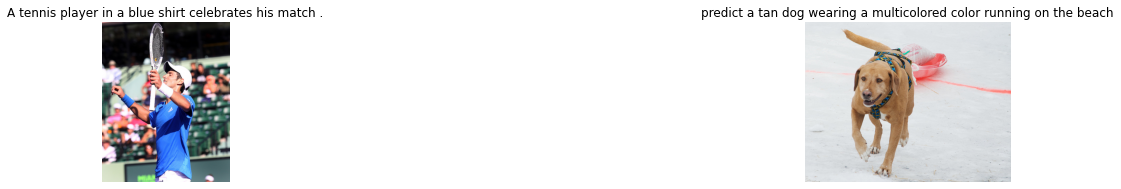

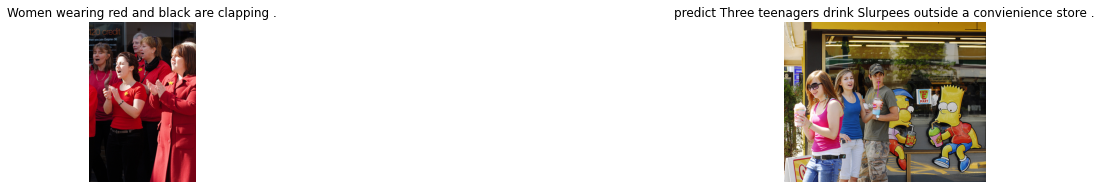

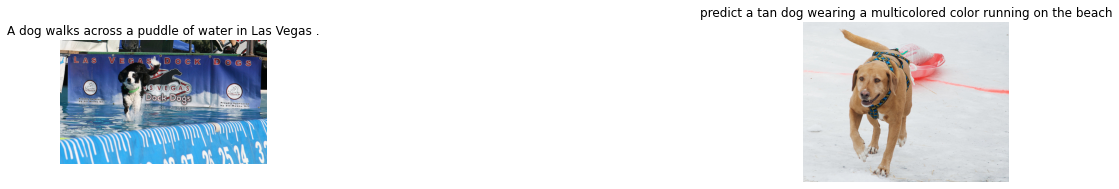

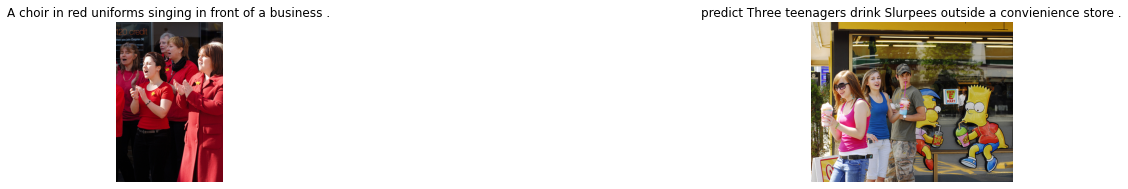

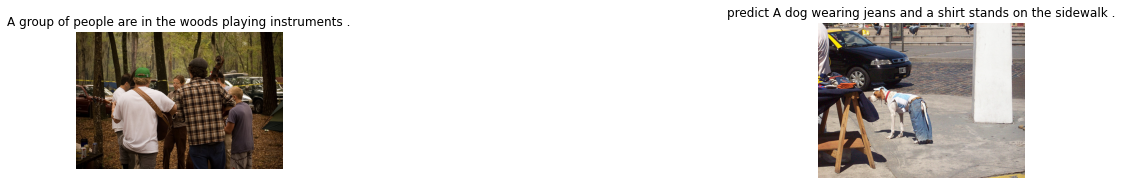

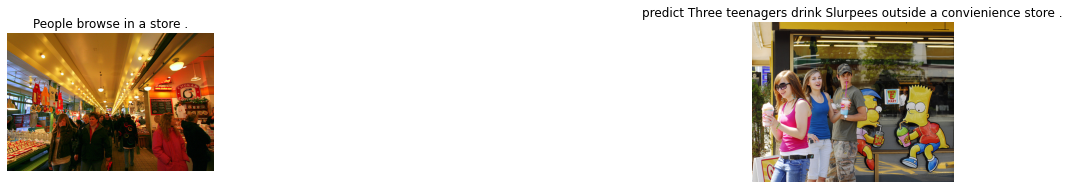

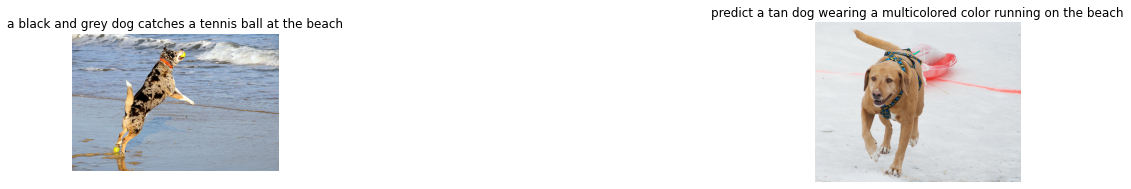

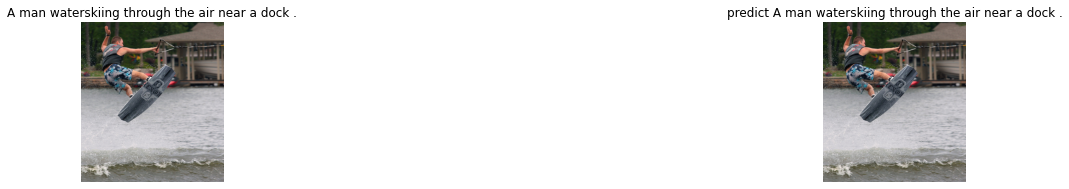

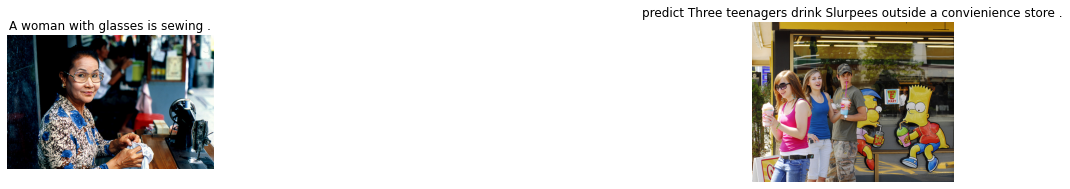

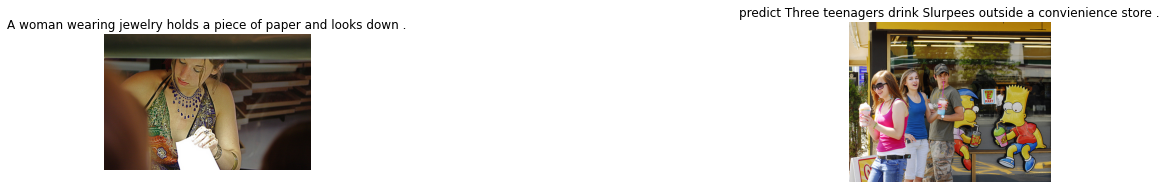

In [41]:
for item in list_for_test:
    tp = 1 #позиция оригинала
    pp = 4 #позиция предсказания
    
    img_query_text, img_name = test_get_predict(df_tt, item, model3)
    img_original = Image.open(f'source/test_images/{df_tt["image"][item]}')
    img_predict = Image.open(f'source/test_images/{img_name}')

    text_original = df_tt["query_text"][item]
    text_predict = img_query_text

    plt.figure(figsize=(17,17))
    plt.subplot(5,4,tp);

    plt.title(text_original)
    plt.axis ('off')
    plt.imshow(img_original)

    plt.subplot(5,4,pp)
    plt.title(f'predict {text_predict}')
    plt.axis ('off')
    plt.imshow(img_predict);
    tp *=5
    pp *=5

## 8. Выводы

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Исследовательский анализ данных выполнен
- [ ]  Проверены экспертные оценки и краудсорсинговые оценки
- [ ]  Из датасета исключены те объекты, которые выходят за рамки юридических ограничений
- [ ]  Изображения векторизованы
- [ ]  Текстовые запросы векторизованы
- [ ]  Данные корректно разбиты на тренировочную и тестовую выборки
- [ ]  Предложена метрика качества работы модели
- [ ]  Предложена модель схожести изображений и текстового запроса
- [ ]  Модель обучена
- [ ]  По итогам обучения модели сделаны выводы
- [ ]  Проведено тестирование работы модели
- [ ]  По итогам тестирования визуально сравнили качество поиска